In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
from torch import nn # nn contains all pytorch's blocks fro neural network
import matplotlib.pyplot as plt

## 1) data (preparing and loading)

In [3]:
# create known parameters
weight=0.7
bias=0.4

#create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= (weight * X)+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4140],
         [0.4280],
         [0.4420],
         [0.4560],
         [0.4700],
         [0.4840],
         [0.4980],
         [0.5120],
         [0.5260]]))

### split data into training and test set

In [4]:
#create train test split
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                    ):
    plt.figure(figsize=(10,7))
    
    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b")
    
    #plot test data in green
    plt.scatter(test_data,test_labels,c="g")
    
    if predictions is not None:
        plt.scatter(test_data,predictions,c="r")
        
    plt.legend(prop={"size":14});

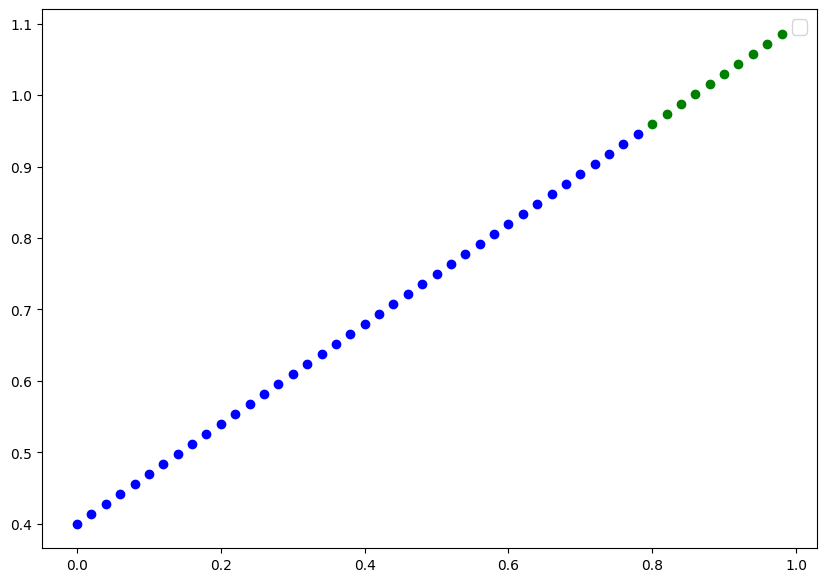

In [6]:
plot_predictions();

## 2) build model

In [7]:
# create regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch is a nn.module (think of this as a neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1, # start with random weights (this will adjusted as the model learns)
                                              dtype=torch.float), # pytorch loves float32 bydefaullt
                                  requires_grad=True) # can we update this value with gradient descent?
        
        self.bias=nn.Parameter(torch.randn(1,# start with random bias (this will adjusted as the model learns)
                                          dtype=torch.float),
                              requires_grad=True)
        
    # forward defines the computation in the model
    def forward(self,x:torch.tensor)-> torch.tensor: # "x" is the input data (ex:- training / testing features)
        return self.weights * x + self.bias # his is the linear regression formula (y = m*x + c)

### checking the content of the pytorch model

In [8]:
# set manual seed since nn.Parameter are randomly initalized
torch.manual_seed(29)

# create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0=LinearRegressionModel()

# check the nn.Parameter(s) within the nn.Module subclass wee created
list(model_0.parameters())

[Parameter containing:
 tensor([1.1474], requires_grad=True),
 Parameter containing:
 tensor([-0.1417], requires_grad=True)]

In [9]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([1.1474])), ('bias', tensor([-0.1417]))])

### making predictions using torch.inference_mode()

In [10]:
# make predictions with model
with torch.inference_mode():
    y_preds=model_0(X_test)
    
# Note: in older pytoch code might be seen torch,no_grad()
# with torch.no_grad():
#     y_preds=model_0(X_test)

In [11]:
print(len(X_test),len(y_preds))
y_preds

10 10


tensor([[0.7763],
        [0.7992],
        [0.8221],
        [0.8451],
        [0.8680],
        [0.8910],
        [0.9139],
        [0.9369],
        [0.9598],
        [0.9828]])

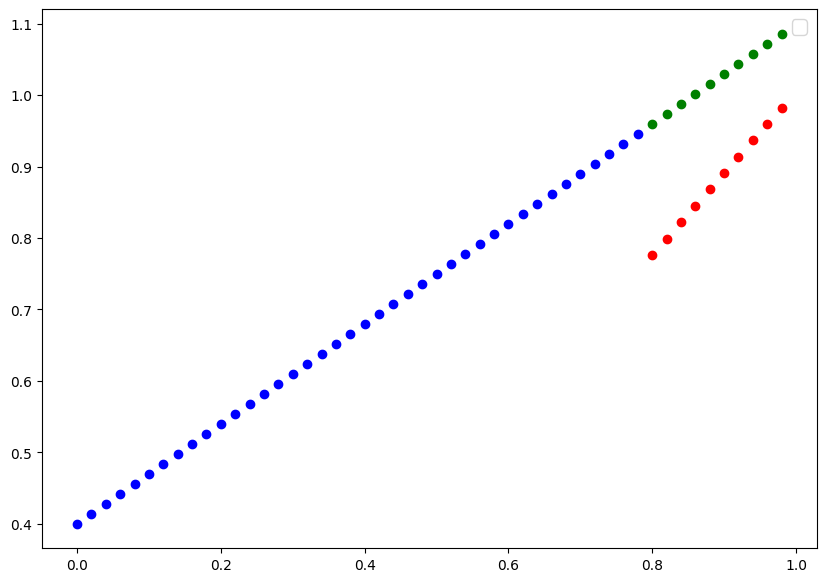

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[0.1837],
        [0.1748],
        [0.1659],
        [0.1569],
        [0.1480],
        [0.1390],
        [0.1301],
        [0.1211],
        [0.1122],
        [0.1032]])

## 3) train model

### creating a loss function and optimizer in pytorch

In [14]:
# creaey the loss function
loss_fn=nn.L1Loss()

# create an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(), # parameters of the target model to optmize
                         lr=0.01)

### creating an optmization loop in pytorch


 It's train time!
 
 do the forward pass,
 
 calculate the loss,
 
 optimizer zero grad,
 
 losssss backwards!
#### 
 Optimizer step step step
#### 
 Let's test now!
 
 with torch no grad:
 

 do the forward pass,
 
 calculate the loss,
 
 watch it go down down down!

In [15]:
torch.manual_seed(42)

# set the number of epochs (how many times the model will pass over teh training data)
epochs=250

#create empty loss lists to track values
train_loss_values=[]
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):
    ## training
    # put the model in training mode (this is teh defualt state of the model)
    model_0.train()
    
    # 1] forward pass on train data using forward() method inside()
    y_pred=model_0(X_train)
    
    # 2] calculate the loss (how different are our models prediction from the ground truth)
    loss=loss_fn(y_pred,y_train)
    
    # 3] zero grad of the optimizer
    optimizer.zero_grad()
    
    # 4] loss backwards 
    loss.backward()
    
    # 5] progress the optimizer
    optimizer.step()
    
    
    ## testing
    # put the model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        # 1] forward pass on test data
        test_pred=model_0(X_test)
        
        # 2] calculate the loss on test data
        test_loss=loss_fn(test_pred,y_test.type(torch.float))
        
        # print what's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(epoch,loss,test_loss)

0 tensor(0.3672, grad_fn=<MeanBackward0>) tensor(0.1300)
10 tensor(0.2520, grad_fn=<MeanBackward0>) tensor(0.0245)
20 tensor(0.1555, grad_fn=<MeanBackward0>) tensor(0.1219)
30 tensor(0.1236, grad_fn=<MeanBackward0>) tensor(0.1806)
40 tensor(0.1119, grad_fn=<MeanBackward0>) tensor(0.2086)
50 tensor(0.1059, grad_fn=<MeanBackward0>) tensor(0.2205)
60 tensor(0.1017, grad_fn=<MeanBackward0>) tensor(0.2234)
70 tensor(0.0981, grad_fn=<MeanBackward0>) tensor(0.2199)
80 tensor(0.0945, grad_fn=<MeanBackward0>) tensor(0.2157)
90 tensor(0.0910, grad_fn=<MeanBackward0>) tensor(0.2116)
100 tensor(0.0876, grad_fn=<MeanBackward0>) tensor(0.2040)
110 tensor(0.0841, grad_fn=<MeanBackward0>) tensor(0.1957)
120 tensor(0.0807, grad_fn=<MeanBackward0>) tensor(0.1882)
130 tensor(0.0773, grad_fn=<MeanBackward0>) tensor(0.1799)
140 tensor(0.0738, grad_fn=<MeanBackward0>) tensor(0.1716)
150 tensor(0.0704, grad_fn=<MeanBackward0>) tensor(0.1640)
160 tensor(0.0670, grad_fn=<MeanBackward0>) tensor(0.1558)
170 tens

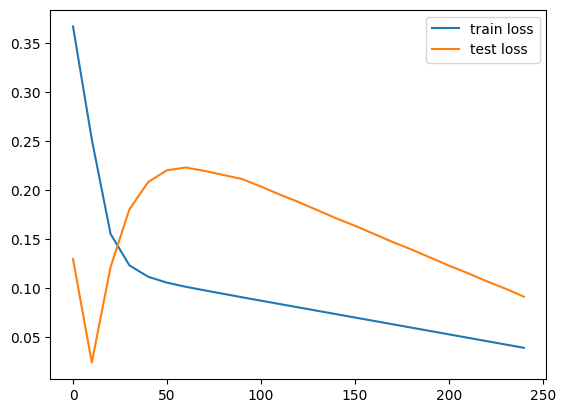

In [16]:
plt.plot(epoch_count,train_loss_values,label="train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.legend()

In [17]:
# find our model's learned parameters
print(model_0.state_dict())
print("\n")
print(f"weights: {weight}, bias: {bias}")

OrderedDict([('weights', tensor([0.8794])), ('bias', tensor([0.3248]))])


weights: 0.7, bias: 0.4


## 4) making predictions with a trained  pytorch model

In [18]:
# 1] set the model in evaluation mode
model_0.eval()

# setup the inference mode context manager
with torch.inference_mode():
    # make sure calcualtion are done with the model and data on the same device
    # in our case, we have not setup device-agnostic code yet so our data and model
    # are on the cpu bu default
    
    y_preds=model_0(X_test)
y_preds

tensor([[1.0283],
        [1.0459],
        [1.0635],
        [1.0811],
        [1.0987],
        [1.1163],
        [1.1338],
        [1.1514],
        [1.1690],
        [1.1866]])

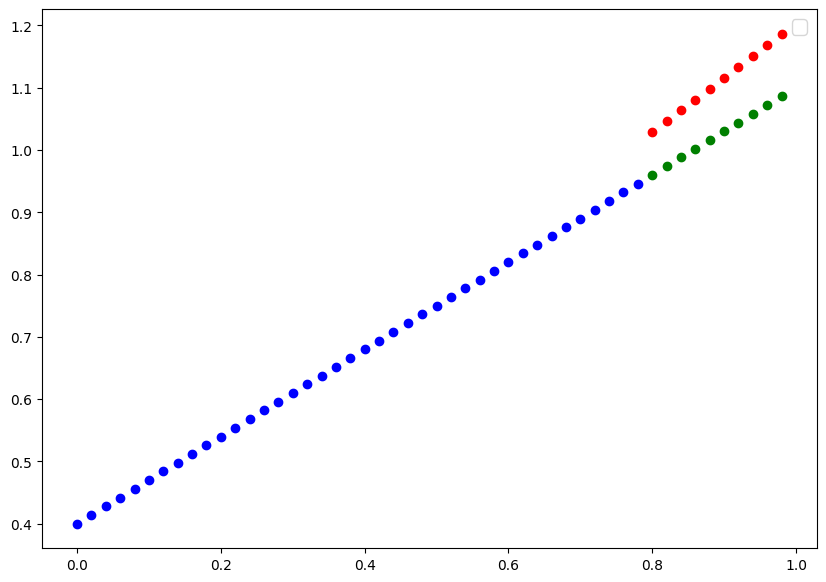

In [19]:
plot_predictions(predictions=y_preds)

## 5) saving and loading model

### saving pytorch model's state_dict()

In [20]:
from pathlib import Path

# 1] create models directory 
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2] create model save path
MODEL_NAME="2_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME 

# 3] save the model state dict
print(MODEL_SAVE_PATH)
torch.save(obj=model_0.state_dict(), # only saving the state_dict() -> only saves the models learned parameters
          f=MODEL_SAVE_PATH)

models/2_pytorch_workflow_model_0.pth


In [21]:
# check the saved file path
!ls -l models/2_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1203 Jan 24 07:51 models/2_pytorch_workflow_model_0.pth


### loading a saved pytorch model's state_dict()

In [22]:
# instantiate a new instance of our model (this will be instantiatedwith random weghts)
loaded_model=LinearRegressionModel()

# load the state_dict of our model (this will update the new instance of our model wiwth trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
# 1] put the loaded model into evaluation mode
loaded_model.eval()

# 2] use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds=loaded_model(X_test)

In [24]:
# compare previous model predictions with loaded model predictions (there should be the same)
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6) putting all together

In [25]:
# setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [26]:
# create weight and bias
weight=0.6
bias=0.5

# create range values
start=0
end=1
setp=0.02

# create X and y
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.5000],
         [0.5120],
         [0.5240],
         [0.5360],
         [0.5480],
         [0.5600],
         [0.5720],
         [0.5840],
         [0.5960],
         [0.6080]]))

In [27]:
#create train test split
train_split=int(0.8 * len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

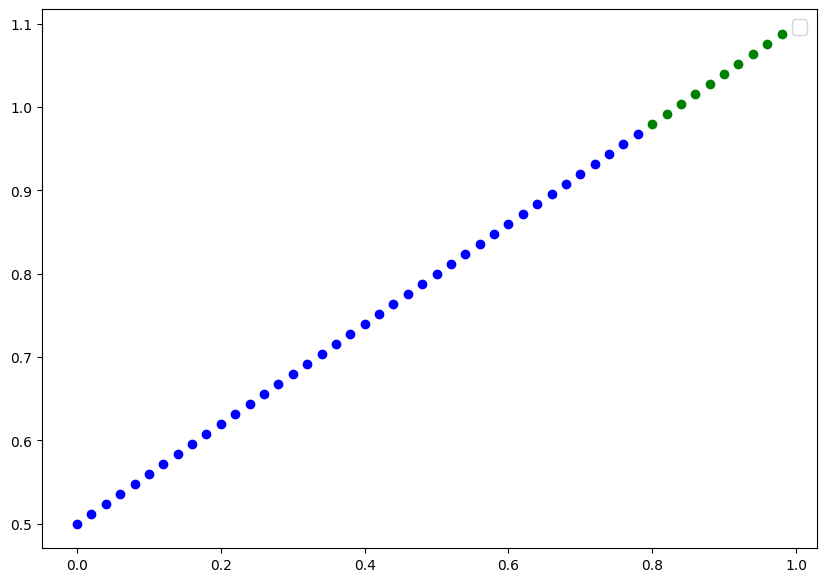

In [28]:
plot_predictions(X_train,y_train,X_test,y_test)

In [29]:
# subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        
        #use nn.Linear() for creating the model parameters
        self.linear_layer=nn.Linear(in_features=1,
                                   out_features=1)
    #define the forward computaion (input data x flows throuhg nn.Linear())
    def forward(self, x:torch.tensor)-> torch.tensor:
        return self.linear_layer(x)

# set the manual seed when creating the model (this isn't always need but is used for demonstative purposes, try commenting it out and setting what happens)
torch.manual_seed(42)
model_1=LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [30]:
# check model device
next(model_1.parameters()).device

device(type='cpu')

In [31]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
# create loss function
loss_fn=nn.L1Loss()

# create optimozer
optimizer=torch.optim.SGD(params=model_1.parameters(),# optimize newly created model's parameters
                         lr=0.01)

In [33]:
torch.manual_seed(42)

#set the number of epochs
epochs=1000

# put data on the available device
X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    ## training
    model_1.train() # train mode is on by defualt after construction 
    
    # 1] forward pass
    y_pred=model_1(X_train)
    
    # 2] calculate loss
    loss=loss_fn(y_pred,y_train)

    # 3] zero grad optimizer
    optimizer.zero_grad()
    
    # 4] loss backward 
    loss.backward()
    
    # 5] step the optimizer
    optimizer.step()
    
    ## testing
    model_1.eval()
    
    # 1] forward pass 
    with torch.inference_mode():
        test_pred=model_1(X_test)
        
        # 2] calculate the loss
        test_loss=loss_fn(test_pred,y_test)
        
    if epoch %100==0:
        print(epoch,loss,test_loss)

0 tensor(0.3942, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.4630, device='cuda:0')
100 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
200 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
300 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
400 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
500 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
600 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
700 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
800 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')
900 tensor(0.0013, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0.0137, device='cuda:0')


In [34]:
# find our model's learned parameters
from pprint import pprint # pprint = pretty print,
pprint(model_1.state_dict())
# pprint()
pprint(f"weight:{weight}, bias: {bias}")

OrderedDict([('linear_layer.weight', tensor([[0.6031]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4975], device='cuda:0'))])
'weight:0.6, bias: 0.5'


In [35]:
# turn the model into evaluation mode
model_1.eval()

# make predictions on the etst data
with torch.inference_mode():
    y_preds=model_1(X_test)

y_preds

tensor([[0.9800],
        [0.9921],
        [1.0041],
        [1.0162],
        [1.0282],
        [1.0403],
        [1.0524],
        [1.0644],
        [1.0765],
        [1.0886]], device='cuda:0')

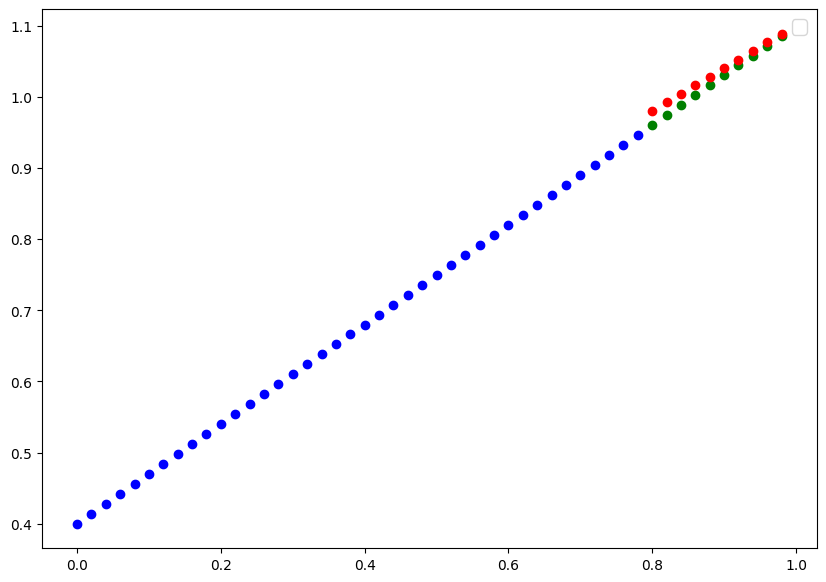

In [36]:
# plot_predictions(predictions=y_preds) # won't work , data not on cpu

# put data on the cpu and plot it
plot_predictions(predictions=y_preds.cpu())

In [37]:
from pathlib import Path

# 1] create model's directory
MODEL_PATH=Path("moedls")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2] create model's save path
MODEL_NAME="2_pytorch_wokflow_model_1.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

# 3] save the model state dict
print(MODEL_SAVE_PATH)
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

moedls/2_pytorch_wokflow_model_1.pth


In [38]:
# instantiate a new instance of our model (this will be instantiatedwith random weghts)
loaded_model_1=LinearRegressionModelV2()

# load the state_dict of our model (this will update the new instance of our model wiwth trained weights)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# put the model to target device (if your data is on gpu, your model have to be on gpu)
loaded_model_1.to(device)

print(loaded_model_1)
print(next(loaded_model_1.parameters()).device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
cuda:0


In [39]:
# evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds=loaded_model_1(X_test)
    
y_preds==loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercise

### 1] Create a straight line dataset using the linear regression formula (weight * X + bias).
- Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
- Split the data into 80% training, 20% testing.
- Plot the training and testing data so it becomes visual.

In [40]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [41]:
weight=0.3
bias=0.9

start=10
end=1010
step=5

X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

In [42]:
X[:5],y[:5]

(tensor([[10],
         [15],
         [20],
         [25],
         [30]]),
 tensor([[3.9000],
         [5.4000],
         [6.9000],
         [8.4000],
         [9.9000]]))

In [43]:
train_split=int(0.8 * len(X))

X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

print(X_train.shape)

(len(X_train), len(y_train), len(X_test), len(y_test))

torch.Size([160, 1])


(160, 160, 40, 40)

In [44]:
def plot_predictions(X_train=X_train,
                 X_test=X_test,
                 y_train=y_train,
                 y_test=y_test,
                 predictions=None):
    plt.scatter(X_train,y_train,c="b",label="train set")
    plt.scatter(X_test,y_test,c="g",label="test set")
    
    if predictions is not None:
        plt.scatter(predictions,X_test,c="r",label="predictions")
    
    plt.legend()
    plt.show()

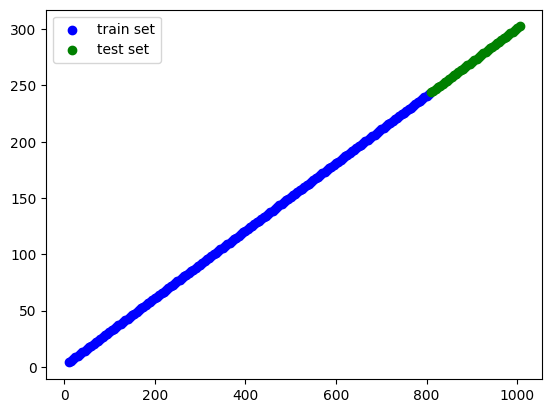

In [45]:
plot_predictions()

### 2] Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().
- Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [46]:
class LinearRegressionModelVx(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
        
    def forward(self, x:torch.tensor)->torch.tensor:
#         x.to(device)
#         print(self.weights.shape)
        return (self.weights * x) + self.bias 
        

In [47]:
torch.manual_seed(42)

model_x=LinearRegressionModelVx()

list(model_x.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [48]:
model_x.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [49]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [50]:
model_x.to(device)
model_x.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

### 3] Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [51]:
loss_fun=nn.L1Loss()

optimizer_x=torch.optim.SGD(params=model_x.parameters(),lr=0.01)

In [52]:
torch.manual_seed(42)

epochs=300

X_train=X_train.to(device)
X_test=X_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
    
    model_x.train()
    
    y_pred=model_x(X_train)
    
    loss=loss_fun(y_pred,y_train)
    
#     model_x.forward()
    
    optimizer_x.zero_grad()
    
    loss.backward()
    
    optimizer_x.step()
    
    model_x.eval()
    
    with torch.inference_mode():
        test_preds=model_x(X_test)
        
        test_loss=loss_fun(test_preds,y_test.type(torch.float))
        
    if epoch % 20 == 0:
        print(epoch, loss, test_loss)

0 tensor(14.1884, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3660.4421, device='cuda:0')
20 tensor(23.3530, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3643.9919, device='cuda:0')
40 tensor(28.4465, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3632.6465, device='cuda:0')
60 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
80 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
100 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
120 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
140 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
160 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
180 tensor(30.9934, device='cuda:0', grad_fn=<MeanBackward0>) tensor(3628.1086, device='cuda:0')
200 tensor(30.9934, device='cuda:0',

### 4] Make predictions with the trained model on the test data.
- Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [53]:
model_x.eval()

with torch.inference_mode():
    y_preds=model_x(X_test)
y_preds

tensor([[306.2646],
        [308.1543],
        [310.0440],
        [311.9337],
        [313.8234],
        [315.7131],
        [317.6028],
        [319.4925],
        [321.3822],
        [323.2719],
        [325.1616],
        [327.0513],
        [328.9410],
        [330.8307],
        [332.7204],
        [334.6101],
        [336.4998],
        [338.3895],
        [340.2792],
        [342.1689],
        [344.0587],
        [345.9484],
        [347.8380],
        [349.7278],
        [351.6175],
        [353.5072],
        [355.3969],
        [357.2866],
        [359.1763],
        [361.0660],
        [362.9557],
        [364.8454],
        [366.7351],
        [368.6248],
        [370.5145],
        [372.4042],
        [374.2939],
        [376.1836],
        [378.0733],
        [379.9630]], device='cuda:0')

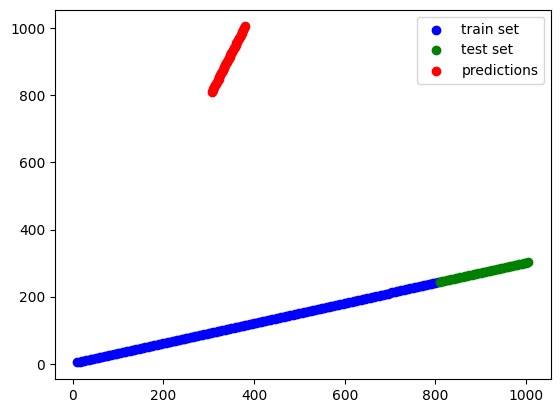

In [54]:
plot_predictions(predictions=y_preds.cpu())

### 5] Save your trained model's state_dict() to file.
- Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [55]:
from pathlib import Path

# 1] create models directory 
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2] create model save path
MODEL_NAME="2_pytorch_workflow_model_x.pth"
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME 

# 3] save the model state dict
print(MODEL_SAVE_PATH)
torch.save(obj=model_x.state_dict(), # only saving the state_dict() -> only saves the models learned parameters
          f=MODEL_SAVE_PATH)


models/2_pytorch_workflow_model_x.pth


In [56]:
!ls -l models/2_pytorch_workflow_model_x.pth

-rw-r--r-- 1 root root 1203 Jan 24 07:51 models/2_pytorch_workflow_model_x.pth


In [57]:
loaded_model_x=LinearRegressionModelVx()

loaded_model_x.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [58]:
loaded_model_x.eval()
loaded_model_x.to(device)

with torch.inference_mode():
    loaded_model_preds=loaded_model_x(X_test)

y_preds

tensor([[306.2646],
        [308.1543],
        [310.0440],
        [311.9337],
        [313.8234],
        [315.7131],
        [317.6028],
        [319.4925],
        [321.3822],
        [323.2719],
        [325.1616],
        [327.0513],
        [328.9410],
        [330.8307],
        [332.7204],
        [334.6101],
        [336.4998],
        [338.3895],
        [340.2792],
        [342.1689],
        [344.0587],
        [345.9484],
        [347.8380],
        [349.7278],
        [351.6175],
        [353.5072],
        [355.3969],
        [357.2866],
        [359.1763],
        [361.0660],
        [362.9557],
        [364.8454],
        [366.7351],
        [368.6248],
        [370.5145],
        [372.4042],
        [374.2939],
        [376.1836],
        [378.0733],
        [379.9630]], device='cuda:0')

In [59]:
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')